In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Question (1a)

In [2]:
df = pd.read_csv('./YouTube-Spam-Collection-v1/Youtube04-Eminem.csv')
df.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,z12rwfnyyrbsefonb232i5ehdxzkjzjs2,Lisa Wellas,NaN,+447935454150 lovely girl talk to me xxx﻿,1
1,z130wpnwwnyuetxcn23xf5k5ynmkdpjrj04,jason graham,2015-05-29T02:26:10.652000,I always end up coming back to this song<br />﻿,0
2,z13vsfqirtavjvu0t22ezrgzyorwxhpf3,Ajkal Khan,NaN,"my sister just received over 6,500 new <a rel=...",1
3,z12wjzc4eprnvja4304cgbbizuved35wxcs,Dakota Taylor,2015-05-29T02:13:07.810000,Cool﻿,0
4,z13xjfr42z3uxdz2223gx5rrzs3dt5hna,Jihad Naser,NaN,Hello I&#39;am from Palastine﻿,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 448 entries, 0 to 447
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   COMMENT_ID  448 non-null    object
 1   AUTHOR      448 non-null    object
 2   DATE        203 non-null    object
 3   CONTENT     448 non-null    object
 4   CLASS       448 non-null    int64 
dtypes: int64(1), object(4)
memory usage: 17.6+ KB


# Question (1c)

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df['CONTENT']).toarray()
df = pd.concat([pd.DataFrame(tfidf_matrix), df['CLASS']], axis=1)
# df.head()

# Question (1b)

In [5]:
ham = df[df['CLASS'] == 0]
spam = df[df['CLASS'] == 1]
ham.info()
spam.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 203 entries, 1 to 447
Columns: 1603 entries, 0 to CLASS
dtypes: float64(1602), int64(1)
memory usage: 2.5 MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 245 entries, 0 to 445
Columns: 1603 entries, 0 to CLASS
dtypes: float64(1602), int64(1)
memory usage: 3.0 MB


In [6]:
ham_80 = ham.iloc[:162, :]
ham_20 = ham.iloc[162:, :]
spam_80 = spam.iloc[:196, :]
spam_20 = spam.iloc[196:, :]

In [7]:
X_train = pd.concat([pd.DataFrame(ham_80.iloc[:, :1602]), pd.DataFrame(spam_80.iloc[:, :1602])])
X_test = pd.concat([pd.DataFrame(ham_20.iloc[:, :1602]), pd.DataFrame(spam_20.iloc[:, :1602])])
y_train = pd.concat([pd.DataFrame(ham_80.iloc[:, 1602]), pd.DataFrame(spam_80.iloc[:, 1602])])
y_test = pd.concat([pd.DataFrame(ham_20.iloc[:, 1602]), pd.DataFrame(spam_20.iloc[:, 1602])])
# print(X_train)
# print(y_train)

# Question (1d) (ii)

In [8]:
from sklearn.linear_model import LogisticRegressionCV

lamdas = np.logspace(-5, 5, num=11)
clf = LogisticRegressionCV(Cs=lamdas, cv=5, penalty='l2').fit(X_train, y_train.to_numpy().ravel())

y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

y_train_score = clf.score(X_train,  y_train)
y_test_score = clf.score(X_test,  y_test)

y_train_prob = clf.predict_proba(X_train)
y_test_prob = clf.predict_proba(X_test)

# Question (1d) (i)

In [9]:
print("Lambdas:")
print(clf.Cs_)
print()
print("Optimal Lambda: ")
print(clf.C_)

Lambdas:
[1.e-05 1.e-04 1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03 1.e+04
 1.e+05]

Optimal Lambda: 
[100.]


# Question (1d) (ii) (continued)

Youtube Spam Filtering Training Data
Confusion Matrix:
[[162   0]
 [  0 196]]
            ROC:  <sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x000002218BE63C70>
Precision Score:  1.0
   Recall Score:  1.0
       F1 Score:  1.0
            AUC:  1.0


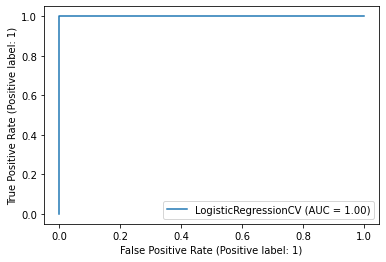

In [10]:
from sklearn.metrics import confusion_matrix, roc_curve, plot_roc_curve, precision_score, recall_score, f1_score, auc, fbeta_score

print('Youtube Spam Filtering Training Data')
CM = confusion_matrix(y_train, y_train_pred)
print('Confusion Matrix:')
print(CM)
fpr, tpr, thresholds = roc_curve(y_train, y_train_prob[:, 1])
print('            ROC: ', plot_roc_curve(clf, X_train, y_train))
print('Precision Score: ', precision_score(y_train, y_train_pred))
print('   Recall Score: ', recall_score(y_train, y_train_pred))
print('       F1 Score: ', f1_score(y_train, y_train_pred))
print('            AUC: ', auc(fpr, tpr))

# Question (1d) (iii)

Youtube Spam Filtering Test Data
Confusion Matrix:
[[40  1]
 [ 1 48]]
            ROC:  <sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x0000022185676CD0>
Precision Score:  0.9795918367346939
   Recall Score:  0.9795918367346939
       F1 Score:  0.9795918367346939
            AUC:  0.9950223992035839


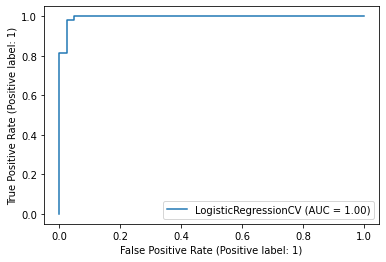

In [11]:
print('Youtube Spam Filtering Test Data')
CM = confusion_matrix(y_test, y_test_pred)
print('Confusion Matrix:')
print(CM)
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob[:, 1])
print('            ROC: ', plot_roc_curve(clf, X_test, y_test))
print('Precision Score: ', precision_score(y_test, y_test_pred))
print('   Recall Score: ', recall_score(y_test, y_test_pred))
print('       F1 Score: ', f1_score(y_test, y_test_pred))
print('            AUC: ', auc(fpr, tpr))

In [12]:
print("F-beta Scores:\n")
print("Beta=0.1, Score =", fbeta_score(y_test, y_test_pred, beta=0.1))
print("Beta=0.5, Score =", fbeta_score(y_test, y_test_pred, beta=0.5))
print("Beta=0.9, Score =", fbeta_score(y_test, y_test_pred, beta=0.9))
print("Beta=1,   Score =", fbeta_score(y_test, y_test_pred, beta=1))
print("Beta=5,   Score =", fbeta_score(y_test, y_test_pred, beta=5))
print("Beta=10,  Score =", fbeta_score(y_test, y_test_pred, beta=10))

F-beta Scores:

Beta=0.1, Score = 0.9795918367346939
Beta=0.5, Score = 0.979591836734694
Beta=0.9, Score = 0.9795918367346939
Beta=1,   Score = 0.9795918367346939
Beta=5,   Score = 0.9795918367346939
Beta=10,  Score = 0.9795918367346939


Precision is as important as recall in this application. This is because I got the same F-beta score when modifying the beta value from 0.1 -> 10. Low Beta value translates to giving more weight to precision and less weight to recall in the calculation while high Beta values translates to giving more weight to recall and less weight to precision. Because I got the same score even when varying my Beta value. For l1 and Naive Bayes Classifier the F-Beta score varied when changing my beta value, meaning that in those models precision/recall was more important.

# Question (1e) (ii)

In [13]:
from sklearn.linear_model import LogisticRegressionCV

lamdas = np.logspace(-5, 5, num=11)

# SOMETIMES FAILS TO CONVERGE ??? -> RESTART NOTEBOOK
clf = LogisticRegressionCV(Cs=lamdas, cv=5, penalty='l1', solver='liblinear', max_iter=10000).fit(X_train, y_train.to_numpy().ravel())

y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

y_train_score = clf.score(X_train,  y_train)
y_test_score = clf.score(X_test,  y_test)

y_train_prob = clf.predict_proba(X_train)
y_test_prob = clf.predict_proba(X_test)

# Question (1e) (i)

In [14]:
print("Lambdas:")
print(clf.Cs_)
print()
print("Optimal Lambda: ")
print(clf.C_)

Lambdas:
[1.e-05 1.e-04 1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03 1.e+04
 1.e+05]

Optimal Lambda: 
[1000.]


# Question (1e) (ii) (continued)

Youtube Spam Filtering Training Data
Confusion Matrix:
[[162   0]
 [  0 196]]
            ROC:  <sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x000002218C80E640>
Precision Score:  1.0
   Recall Score:  1.0
       F1 Score:  1.0
            AUC:  1.0


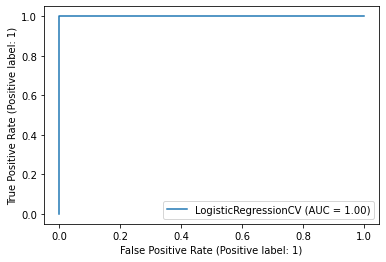

In [15]:
print('Youtube Spam Filtering Training Data')
CM = confusion_matrix(y_train, y_train_pred)
print('Confusion Matrix:')
print(CM)
fpr, tpr, thresholds = roc_curve(y_train, y_train_prob[:, 1])
print('            ROC: ', plot_roc_curve(clf, X_train, y_train))
print('Precision Score: ', precision_score(y_train, y_train_pred))
print('   Recall Score: ', recall_score(y_train, y_train_pred))
print('       F1 Score: ', f1_score(y_train, y_train_pred))
print('            AUC: ', auc(fpr, tpr))

# Question (1e) (iii)

Youtube Spam Filtering Test Data
Confusion Matrix:
[[41  0]
 [ 6 43]]
            ROC:  <sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x000002218C8E86A0>
Precision Score:  1.0
   Recall Score:  0.8775510204081632
       F1 Score:  0.9347826086956522
            AUC:  0.9975111996017919


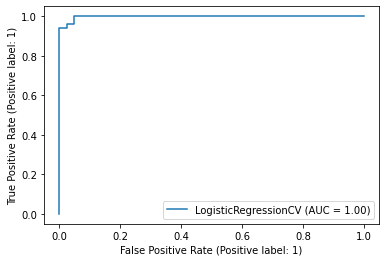

In [16]:
print('Youtube Spam Filtering Test Data')
CM = confusion_matrix(y_test, y_test_pred)
print('Confusion Matrix:')
print(CM)
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob[:, 1])
print('            ROC: ', plot_roc_curve(clf, X_test, y_test))
print('Precision Score: ', precision_score(y_test, y_test_pred))
print('   Recall Score: ', recall_score(y_test, y_test_pred))
print('       F1 Score: ', f1_score(y_test, y_test_pred))
print('            AUC: ', auc(fpr, tpr))

# Question (1f)

In [17]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB().fit(X_train, y_train.to_numpy().ravel())

y_train_pred = gnb.predict(X_train)
y_test_pred = gnb.predict(X_test)

y_train_score = gnb.score(X_train,  y_train)
y_test_score = gnb.score(X_test,  y_test)

y_train_prob = gnb.predict_proba(X_train)
y_test_prob = gnb.predict_proba(X_test)

Youtube Spam Filtering Training Data
Confusion Matrix:
[[162   0]
 [  1 195]]
            ROC:  <sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x000002218C94D730>
Precision Score:  1.0
   Recall Score:  0.9948979591836735
       F1 Score:  0.9974424552429668
            AUC:  0.9974489795918368


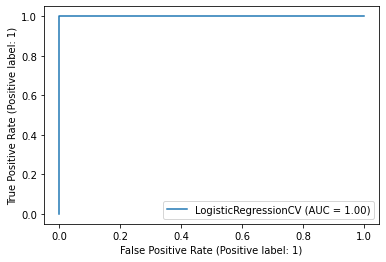

In [18]:
print('Youtube Spam Filtering Training Data')
CM = confusion_matrix(y_train, y_train_pred)
print('Confusion Matrix:')
print(CM)
fpr, tpr, thresholds = roc_curve(y_train, y_train_prob[:, 1], pos_label=1)
print('            ROC: ', plot_roc_curve(clf, X_train, y_train))
print('Precision Score: ', precision_score(y_train, y_train_pred, pos_label=1))
print('   Recall Score: ', recall_score(y_train, y_train_pred, pos_label=1))
print('       F1 Score: ', f1_score(y_train, y_train_pred, pos_label=1))
print('            AUC: ', auc(fpr, tpr))

Youtube Spam Filtering Test Data
Confusion Matrix:
[[35  6]
 [ 1 48]]
            ROC:  <sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x000002218C99E460>
Precision Score:  0.8888888888888888
   Recall Score:  0.9795918367346939
       F1 Score:  0.9320388349514563
            AUC:  0.9166251866600298


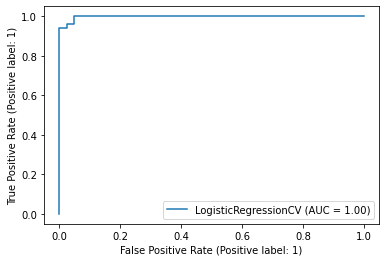

In [19]:
print('Youtube Spam Filtering Test Data')
CM = confusion_matrix(y_test, y_test_pred)
print('Confusion Matrix:')
print(CM)
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob[:, 1])
print('            ROC: ', plot_roc_curve(clf, X_test, y_test))
print('Precision Score: ', precision_score(y_test, y_test_pred))
print('   Recall Score: ', recall_score(y_test, y_test_pred))
print('       F1 Score: ', f1_score(y_test, y_test_pred))
print('            AUC: ', auc(fpr, tpr))